In [1]:
PATH="C:\\Users\\98gud\\Desktop\\paper\\ieee-fraud-detection\\"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

from tqdm.notebook import tqdm

In [2]:
test_identity=pd.read_csv(PATH+"test_identity.csv")
test_transaction=pd.read_csv(PATH+"test_transaction.csv")
train_identity=pd.read_csv(PATH+"train_identity.csv")
train_transaction=pd.read_csv(PATH+"train_transaction.csv")

display(test_identity.head())
display(train_identity.head())

,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [7]:
display(test_transaction.head())
display(train_transaction.head())

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
## train_transaction 에 isfraud 항목이 있음

In [9]:
print(train_transaction.shape)
print(train_identity.shape)
print(test_transaction.shape)
print(test_identity.shape)

(590540, 394)
(144233, 41)
(506691, 393)
(141907, 41)


In [3]:
train_y=train_transaction[['TransactionID','isFraud']]

In [12]:
display(train_y.head())

,TransactionID,isFraud
0,2987000,0
1,2987001,0
2,2987002,0
3,2987003,0
4,2987004,0


In [15]:
train_y[['isFraud']].value_counts()

isFraud
0          569877
1           20663
dtype: int64

In [5]:
print(list(train_identity.columns))
print(list(train_transaction.columns))

['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']
['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',

# _____________________________________#

<AxesSubplot:>

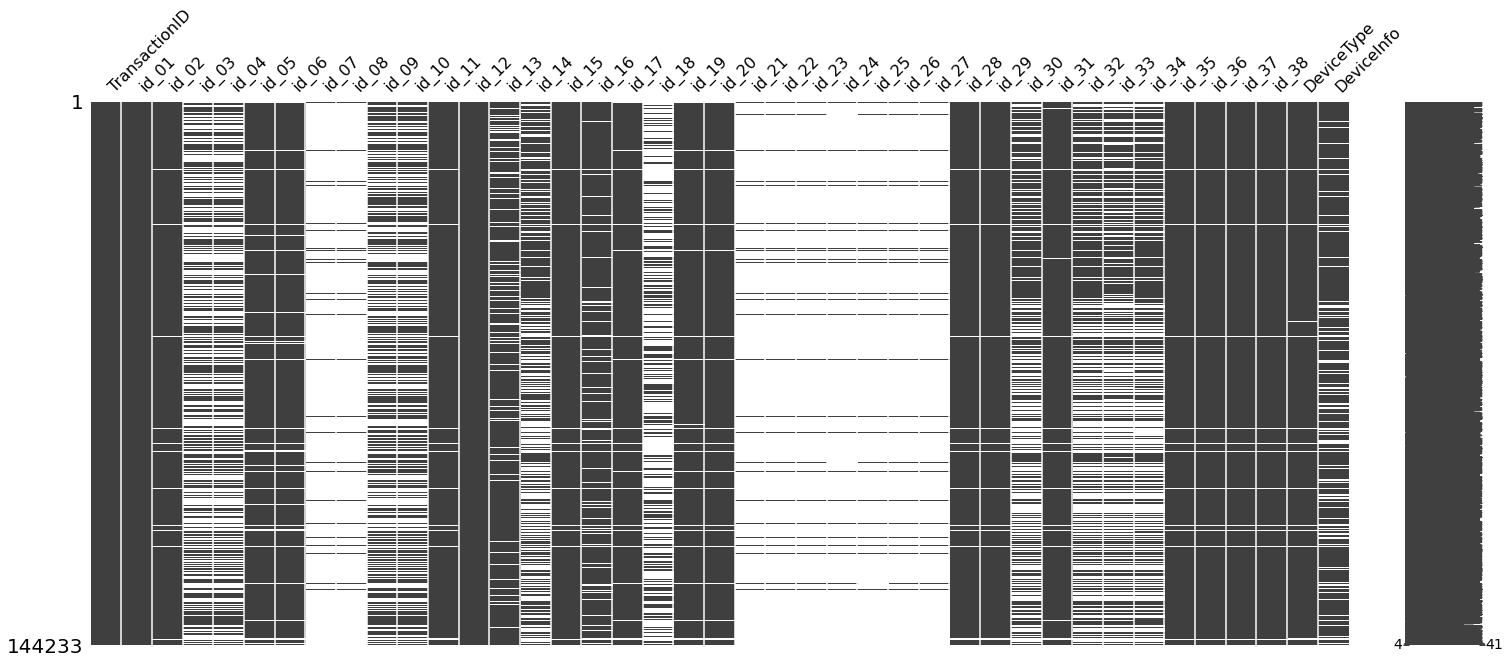

In [17]:
missingno.matrix(train_identity)

<AxesSubplot:>

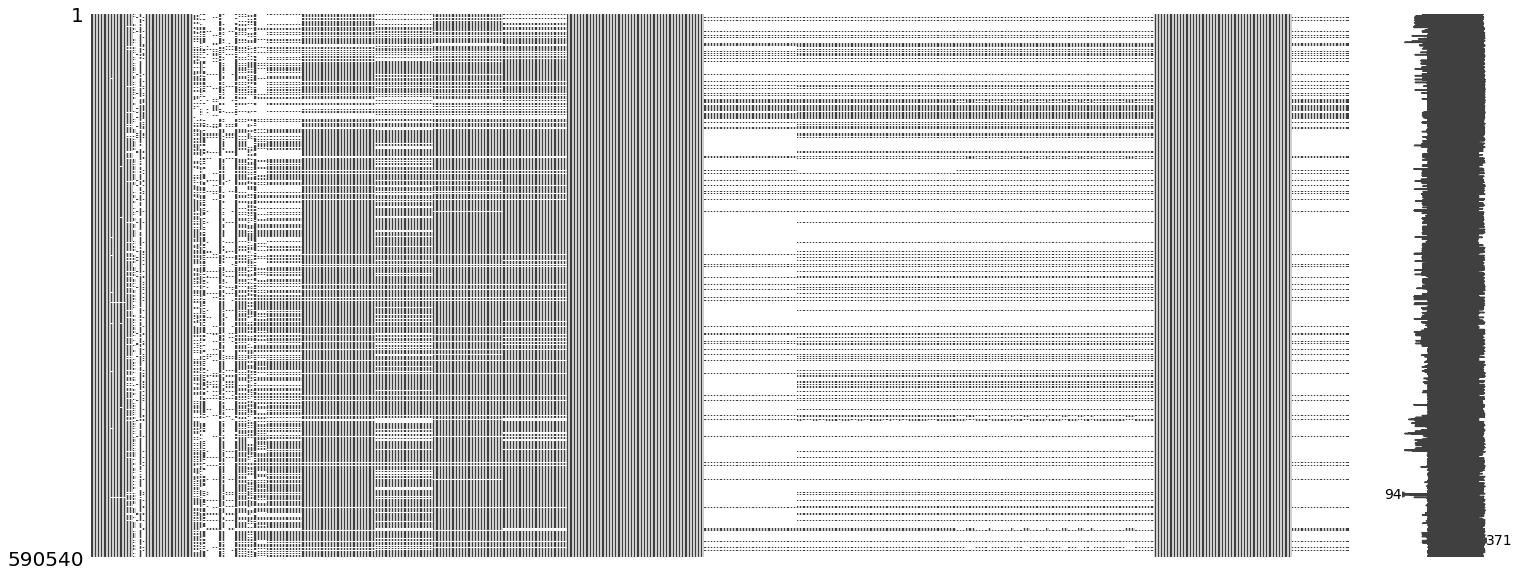

In [18]:
missingno.matrix(train_transaction)

<AxesSubplot:>

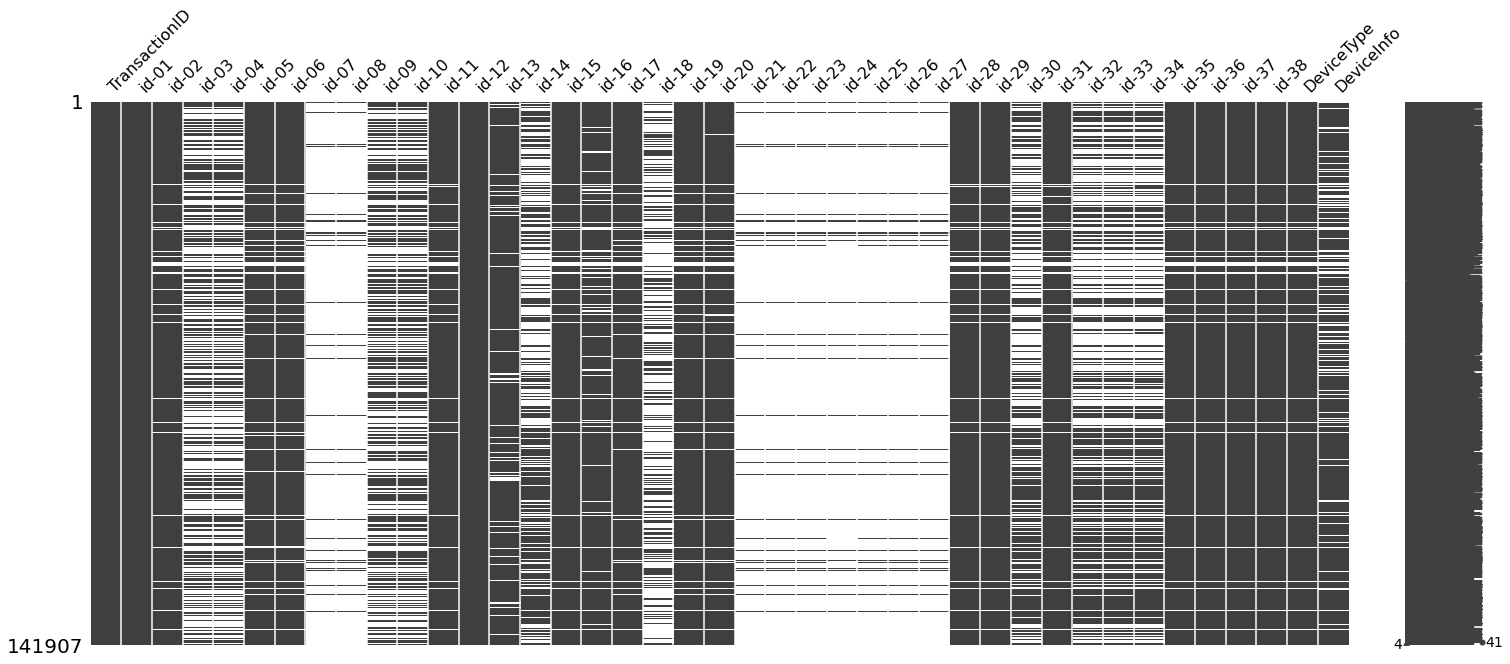

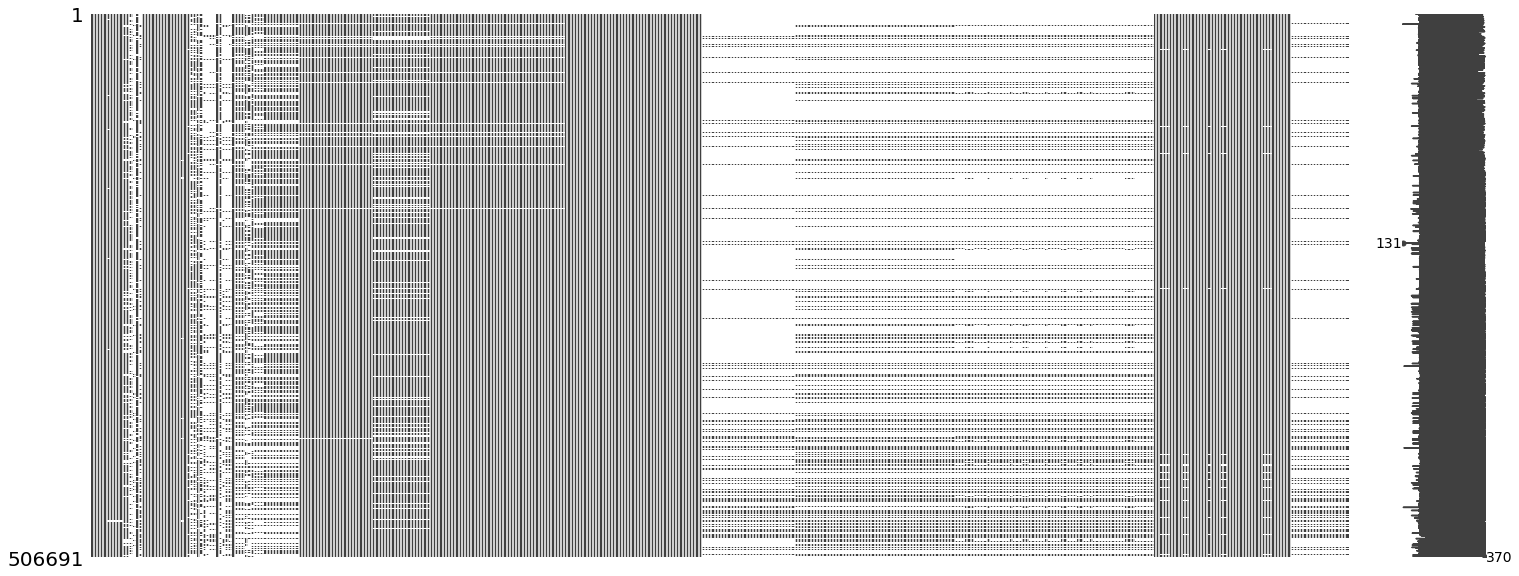

In [19]:
missingno.matrix(test_identity)
missingno.matrix(test_transaction)

In [26]:
print(train_identity.isnull().sum()/train_identity.shape[0])
print(train_transaction.isnull().sum()/train_transaction.shape[0])
print(test_identity.isnull().sum()/test_identity.shape[0])
print(test_transaction.isnull().sum()/test_transaction.shape[0])

TransactionID    0.000000
id_01            0.000000
id_02            0.023303
id_03            0.540161
id_04            0.540161
id_05            0.051084
id_06            0.051084
id_07            0.964259
id_08            0.964259
id_09            0.480521
id_10            0.480521
id_11            0.022568
id_12            0.000000
id_13            0.117262
id_14            0.445037
id_15            0.022519
id_16            0.103257
id_17            0.033723
id_18            0.687221
id_19            0.034077
id_20            0.034472
id_21            0.964231
id_22            0.964162
id_23            0.964162
id_24            0.967088
id_25            0.964419
id_26            0.964204
id_27            0.964162
id_28            0.022568
id_29            0.022568
id_30            0.462224
id_31            0.027393
id_32            0.462079
id_33            0.491871
id_34            0.460560
id_35            0.022519
id_36            0.022519
id_37            0.022519
id_38       

In [62]:
tri_idx=sorted(train_identity.TransactionID)
trt_idx=sorted(train_transaction.TransactionID)
tei_idx=sorted(test_identity.TransactionID)
tet_idx=sorted(test_transaction.TransactionID)

print(f"train identity와 train transaction 중 train identity에만 있는 인덱스 : {len(set(tri_idx)-set(trt_idx))}")
print(f"train identity와 test identity 중 train identity에만 있는 인덱스 : {len(set(tri_idx)-set(tei_idx))}")
print(f"train identity와 train transaction 중 train transaction에만 있는 인덱스 : {len(set(trt_idx)-set(tri_idx))}")


train identity와 train transaction 중 train identity에만 있는 인덱스 : 0
train identity와 test identity 중 train identity에만 있는 인덱스 : 144233
train identity와 train transaction 중 train transaction에만 있는 인덱스 : 446307


In [63]:
for i,val in enumerate(tri_idx):
    if i>1000:break
    else: print(val)

2987004
2987008
2987010
2987011
2987016
2987017
2987022
2987038
2987040
2987048
2987049
2987057
2987066
2987069
2987070
2987072
2987074
2987084
2987093
2987099
2987100
2987101
2987104
2987105
2987108
2987111
2987114
2987119
2987121
2987125
2987130
2987138
2987141
2987144
2987145
2987148
2987156
2987167
2987173
2987183
2987188
2987189
2987190
2987192
2987196
2987197
2987198
2987199
2987207
2987209
2987211
2987236
2987240
2987243
2987245
2987248
2987252
2987258
2987259
2987262
2987265
2987266
2987270
2987271
2987273
2987275
2987281
2987284
2987287
2987288
2987301
2987311
2987316
2987319
2987327
2987328
2987332
2987333
2987335
2987336
2987337
2987338
2987352
2987355
2987361
2987366
2987367
2987368
2987374
2987376
2987380
2987384
2987386
2987387
2987389
2987390
2987398
2987404
2987405
2987406
2987408
2987412
2987416
2987425
2987429
2987433
2987434
2987435
2987437
2987438
2987439
2987443
2987446
2987449
2987455
2987456
2987457
2987461
2987462
2987463
2987465
2987466
2987467
2987469
2987476


In [64]:
for i,val in enumerate(trt_idx):
    if i>1000:break
    else: print(val)

2987000
2987001
2987002
2987003
2987004
2987005
2987006
2987007
2987008
2987009
2987010
2987011
2987012
2987013
2987014
2987015
2987016
2987017
2987018
2987019
2987020
2987021
2987022
2987023
2987024
2987025
2987026
2987027
2987028
2987029
2987030
2987031
2987032
2987033
2987034
2987035
2987036
2987037
2987038
2987039
2987040
2987041
2987042
2987043
2987044
2987045
2987046
2987047
2987048
2987049
2987050
2987051
2987052
2987053
2987054
2987055
2987056
2987057
2987058
2987059
2987060
2987061
2987062
2987063
2987064
2987065
2987066
2987067
2987068
2987069
2987070
2987071
2987072
2987073
2987074
2987075
2987076
2987077
2987078
2987079
2987080
2987081
2987082
2987083
2987084
2987085
2987086
2987087
2987088
2987089
2987090
2987091
2987092
2987093
2987094
2987095
2987096
2987097
2987098
2987099
2987100
2987101
2987102
2987103
2987104
2987105
2987106
2987107
2987108
2987109
2987110
2987111
2987112
2987113
2987114
2987115
2987116
2987117
2987118
2987119
2987120
2987121
2987122
2987123
2987124


In [65]:
## train_transaction에는 모든 고객들이 있지만, train_identity에는 모든 고객이 있는 것은 아님,
## 하지만 다행히도 train_transaction 에 isfraud 칼럼이 있기 때문에 모든 고객의 fraud 여부를 알 수 있음

## 그렇지만 ... transaction 과 identity를 합치면서 발생하는 null 값들은 모두 어떻게 처리할 것인가? 0으로 할 것인가? 

<AxesSubplot:>

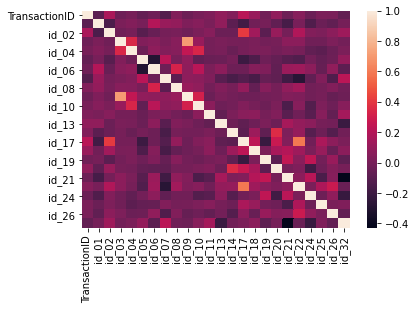

In [67]:
sns.heatmap(train_identity.corr())

<AxesSubplot:>

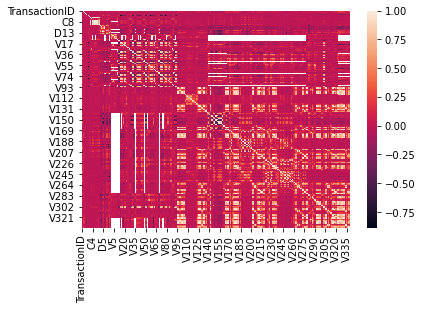

In [68]:
sns.heatmap(train_transaction.corr())

In [4]:
del_tt=[]
for col in train_transaction.columns:
    if train_transaction[col].isnull().sum()/train_transaction.shape[0]>0.5:
        #train_transaction.drop(train_transaction[[col]],axis=1,inplace=True)
        del_tt.append(col)

In [7]:
len(del_tt)

174

In [10]:
print(del_tt)

['dist1', 'dist2', 'R_emaildomain', 'D5', 'D6', 'D7', 'D8', 'D9', 'D12', 'D13', 'D14', 'M5', 'M7', 'M8', 'M9', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', '

In [24]:
for col in del_tt:
    print(f"{col}의 비율: {train_transaction[col].isnull().sum()/train_transaction.shape[0]}")

dist1의 비율: 0.596523520845328
dist2의 비율: 0.9362837403054831
R_emaildomain의 비율: 0.7675161716395164
D5의 비율: 0.524674027161581
D6의 비율: 0.8760676668811597
D7의 비율: 0.9340992989467267
D8의 비율: 0.8731229044603245
D9의 비율: 0.8731229044603245
D12의 비율: 0.8904104717715988
D13의 비율: 0.8950926270870728
D14의 비율: 0.8946946862193924
M5의 비율: 0.5934940901547736
M7의 비율: 0.5863531682866528
M8의 비율: 0.5863311545365258
M9의 비율: 0.5863311545365258
V138의 비율: 0.8612371727571375
V139의 비율: 0.8612371727571375
V140의 비율: 0.8612371727571375
V141의 비율: 0.8612371727571375
V142의 비율: 0.8612371727571375
V143의 비율: 0.8612270125647712
V144의 비율: 0.8612270125647712
V145의 비율: 0.8612270125647712
V146의 비율: 0.8612371727571375
V147의 비율: 0.8612371727571375
V148의 비율: 0.8612371727571375
V149의 비율: 0.8612371727571375
V150의 비율: 0.8612270125647712
V151의 비율: 0.8612270125647712
V152의 비율: 0.8612270125647712
V153의 비율: 0.8612371727571375
V154의 비율: 0.8612371727571375
V155의 비율: 0.8612371727571375
V156의 비율: 0.8612371727571375
V157의 비율: 0.86123717275713

C:\Users\98gud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='D8', ylabel='isFraud'>

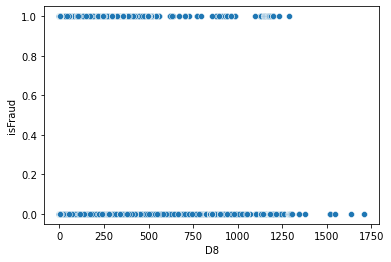

In [76]:
sns.scatterplot(train_transaction['D8'],train_y['isFraud'])

In [58]:
train_transaction['dist1'].shape

(590540,)

In [69]:
train_y

,TransactionID,isFraud
0,2987000,0
1,2987001,0
2,2987002,0
3,2987003,0
4,2987004,0
...,...,...
590535,3577535,0
590536,3577536,0
590537,3577537,0
590538,3577538,0


In [43]:
train_transaction[['V138', 'V139', 'V140', 'V141', 'V142']].corr()

,V138,V139,V140,V141,V142
V138,1.000000,0.361921,0.355494,0.526152,0.397407
V139,0.361921,1.000000,0.945770,0.215163,0.159916
V140,0.355494,0.945770,1.000000,0.294439,0.285190
V141,0.526152,0.215163,0.294439,1.000000,0.877733
V142,0.397407,0.159916,0.285190,0.877733,1.000000


<AxesSubplot:>

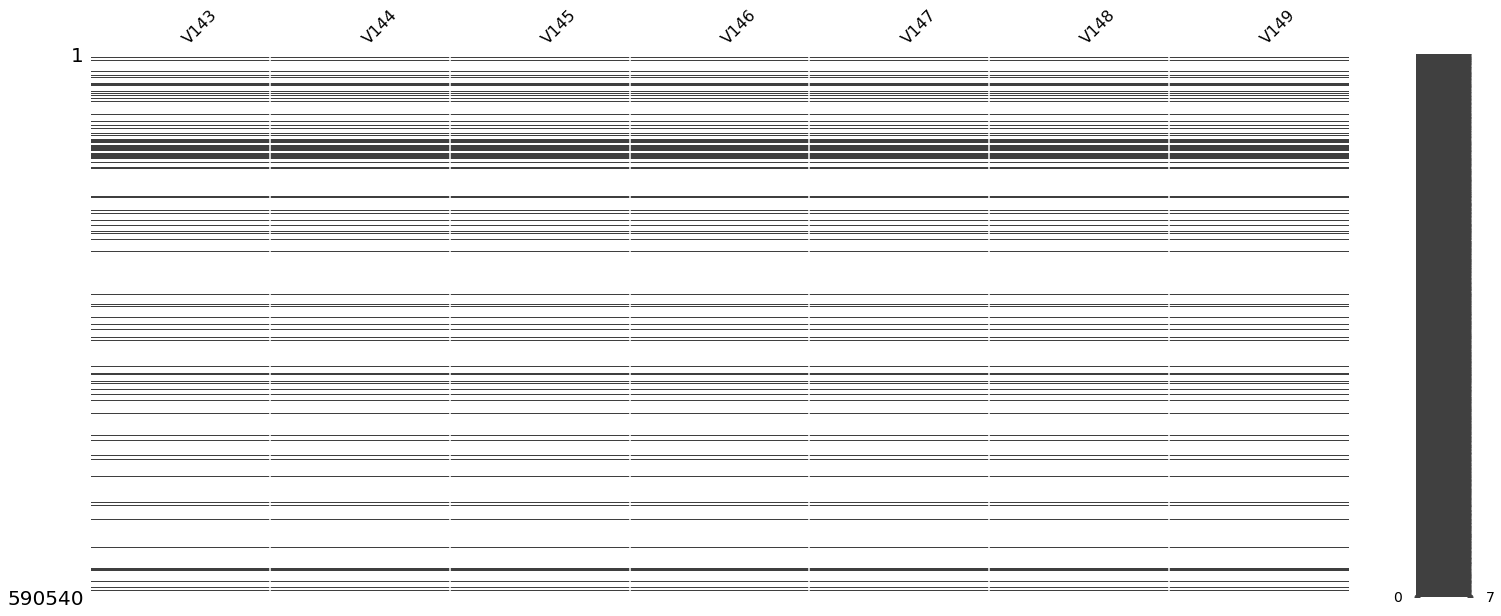

In [38]:
missingno.matrix(train_transaction[[ 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149']])

In [ ]:
missingno.matrix(train_transaction[['M7','M8','M9']])

<AxesSubplot:>

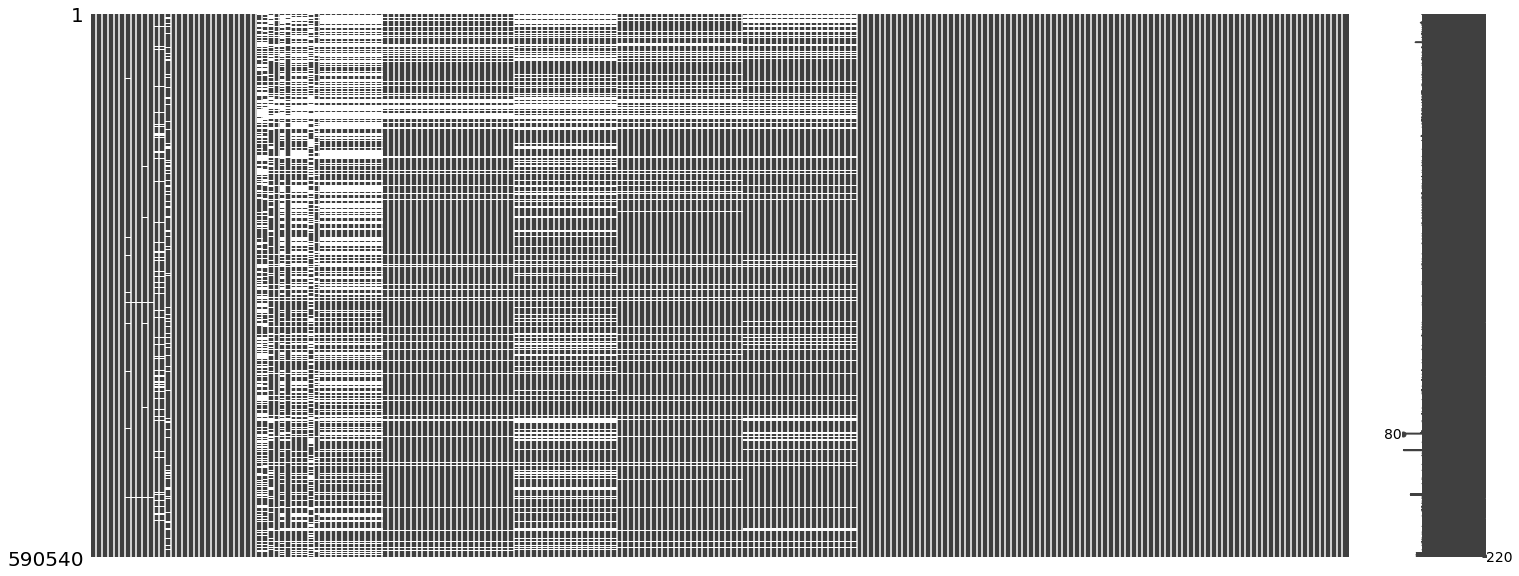

In [5]:
missingno.matrix(train_transaction)

In [6]:
train_transaction.shape

(590540, 220)

In [5]:
del_ti=[]
for col in train_identity.columns:
    if train_identity[col].isnull().sum()/train_identity.shape[0]>0.5:
        #train_identity.drop(train_identity[[col]],axis=1,inplace=True)
        del_ti.append(col)

In [46]:
print(len(del_ti))
for col in del_ti:
    print(f"{col}의 비율: {train_identity[col].isnull().sum()/train_identity.shape[0]}")

12
id_03의 비율: 0.5401607121809849
id_04의 비율: 0.5401607121809849
id_07의 비율: 0.9642592194574058
id_08의 비율: 0.9642592194574058
id_18의 비율: 0.6872213709761289
id_21의 비율: 0.9642314865530079
id_22의 비율: 0.9641621542920136
id_23의 비율: 0.9641621542920136
id_24의 비율: 0.9670879757059757
id_25의 비율: 0.9644186836576928
id_26의 비율: 0.9642037536486102
id_27의 비율: 0.9641621542920136


In [ ]:
train_identity

<AxesSubplot:>

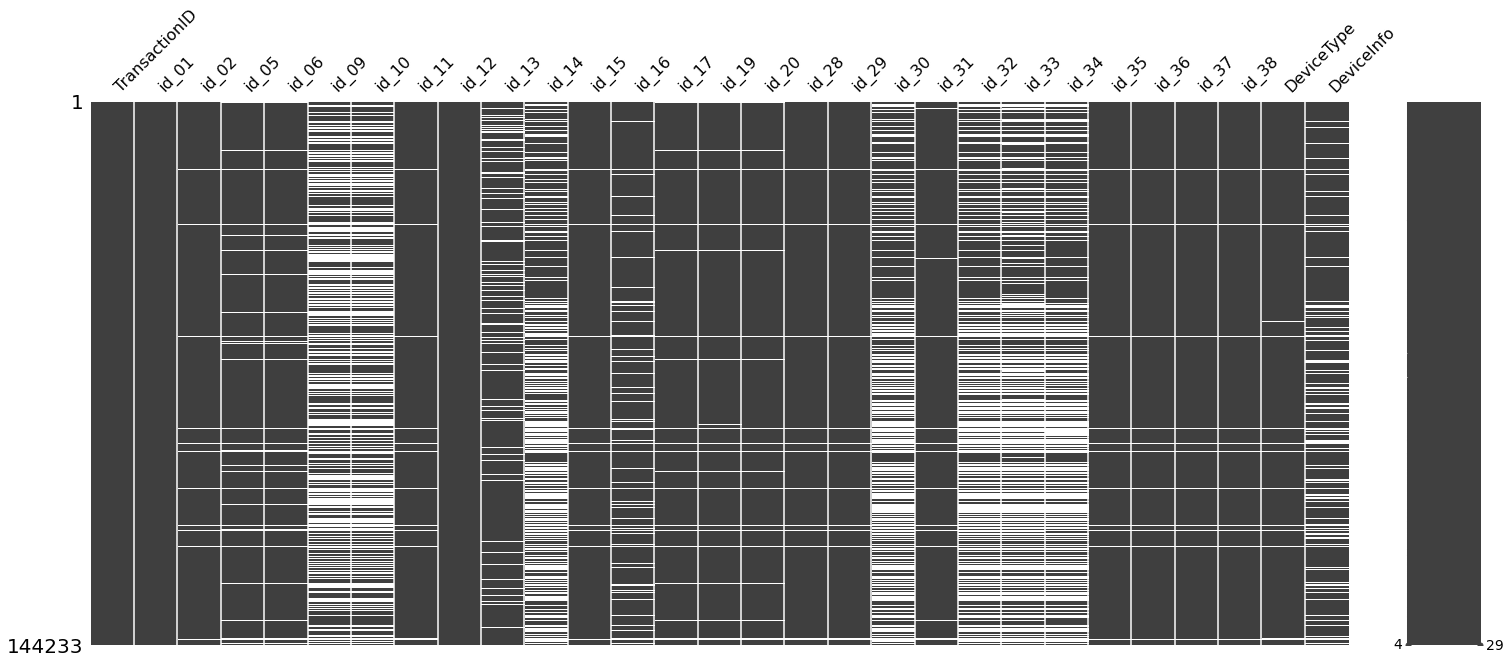

In [8]:
missingno.matrix(train_identity)

In [9]:
train_identity.shape

(144233, 29)

In [12]:
train_transaction.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
V317              float64
V318              float64
V319              float64
V320              float64
V321              float64
Length: 220, dtype: object

# __________________________________#

In [78]:
train_transaction[['V138']].isnull().sum()

V138    508595
dtype: int64

In [131]:
train_transaction.loc[train_transaction['R_emaildomain'].isnull(),['isFraud']].value_counts()

isFraud
0          443813
1            9436
dtype: int64

In [101]:
train_transaction.loc[train_transaction['V322'].isnull(),['isFraud']].value_counts()

isFraud
0          491212
1           16977
dtype: int64

In [133]:
grouped=train_transaction.groupby('R_emaildomain')
grouped.mean()['isFraud']

R_emaildomain
aim.com             0.027778
anonymous.com       0.029130
aol.com             0.034855
att.net             0.000000
bellsouth.net       0.004739
cableone.net        0.000000
centurylink.net     0.000000
cfl.rr.com          0.000000
charter.net         0.039370
comcast.net         0.011589
cox.net             0.023965
earthlink.net       0.075949
embarqmail.com      0.000000
frontier.com        0.000000
frontiernet.net     0.000000
gmail               0.000000
gmail.com           0.119184
gmx.de              0.000000
hotmail.co.uk       0.000000
hotmail.com         0.077793
hotmail.de          0.000000
hotmail.es          0.068493
hotmail.fr          0.000000
icloud.com          0.128755
juno.com            0.000000
live.com            0.049869
live.com.mx         0.058355
live.fr             0.000000
mac.com             0.009174
mail.com            0.377049
me.com              0.019784
msn.com             0.001174
netzero.com         0.000000
netzero.net         0.222222


In [142]:
print(len(train_transaction['TransactionID'].unique()))
print(train_transaction.shape)

590540
(590540, 394)


In [144]:
print(len(train_identity['TransactionID'].unique()))

144233


In [6]:
index=train_identity[['TransactionID']]
print(index)

        TransactionID
0             2987004
1             2987008
2             2987010
3             2987011
4             2987016
...               ...
144228        3577521
144229        3577526
144230        3577529
144231        3577531
144232        3577534

[144233 rows x 1 columns]


In [7]:
identity_identifier=np.zeros(train_transaction.shape[0])
for i in range(len(index)):
    identity_identifier[i]=1
train_transaction['identity']=identity_identifier
grouped=train_transaction.groupby('identity')
grouped.sum()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
identity,,,,,,,,,,,,,,,,,,,,,
0.0,1497085952502,16874,4132655756994,6.132359e+07,4422429417,158128606.0,68081602.0,88118253.0,115081571.0,34427727.0,...,57704.0,5.596505e+07,1.088055e+08,7.962982e+07,420506.0,4.070628e+06,1.786863e+06,3.313234e+06,1.098112e+07,6.983813e+06
1.0,441225478028,3789,220988964082,1.841535e+07,1423169348,52736204.0,22146379.0,28715178.0,37505409.0,11128195.0,...,6190.0,3.471117e+06,4.491625e+06,3.925380e+06,387111.5,8.016318e+05,5.626854e+05,1.245093e+06,1.467100e+06,1.309005e+06


In [158]:
train_transaction['identity'].value_counts()

0.0    446307
1.0    144233
Name: identity, dtype: int64

In [152]:
train_transaction

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V331,V332,V333,V334,V335,V336,V337,V338,V339,identity
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [163]:
train_transaction['TransactionID'].value_counts()

3147775    1
3089230    1
3189951    1
3187902    1
3194045    1
          ..
3043995    1
3046042    1
3039897    1
3041944    1
3145728    1
Name: TransactionID, Length: 590540, dtype: int64

In [164]:
train_identity['TransactionID'].value_counts()

3153916    1
3548654    1
3079669    1
3077620    1
3067379    1
          ..
3250108    1
3146453    1
3412695    1
3177178    1
3147777    1
Name: TransactionID, Length: 144233, dtype: int64

In [13]:
grouped=train_transaction.groupby('ProductCD')
grouped.mean()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V331,V332,V333,V334,V335,V336,V337,V338,V339,identity
ProductCD,,,,,,,,,,,,,,,,,,,,,
C,3.278178e+06,0.116873,7.242143e+06,42.872353,9953.408106,387.420736,177.662208,180.129905,304.045882,59.397647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.259475
H,3.163060e+06,0.047662,4.270543e+06,73.170058,9898.226896,391.023632,149.971717,204.237311,294.645902,86.615726,...,32.204806,43.499343,39.263562,2.096884,4.396676,3.165785,12.083909,15.215192,13.586876,0.644985
R,3.203595e+06,0.037826,5.286173e+06,168.306188,9671.795087,397.189590,149.916735,197.711287,293.428219,87.100401,...,110.225338,133.046435,121.033118,10.652802,18.503715,14.372994,45.583437,50.775511,47.451391,0.547972
S,3.298124e+06,0.058996,7.889303e+06,60.269487,10027.453388,391.357081,150.020124,190.622057,311.721166,87.007093,...,4662.646139,9188.589525,6681.779610,28.961988,346.533578,146.470072,209.908695,862.708058,520.747790,0.269092
W,3.298188e+06,0.020399,7.790774e+06,153.158554,9906.306819,352.689426,149.989783,202.247317,289.561303,86.995469,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.185064


In [14]:
grouped=train_transaction.groupby('card1')
grouped.mean()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card2,card3,card5,addr1,addr2,dist1,...,V331,V332,V333,V334,V335,V336,V337,V338,V339,identity
card1,,,,,,,,,,,,,,,,,,,,,
1000,3.230924e+06,0.0,5.787419e+06,23.443000,555.0,185.0,224.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1001,3.128570e+06,0.0,3.230302e+06,79.666667,555.0,150.0,226.0,269.000000,87.0,11.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.333333
1004,3.288987e+06,0.0,7.810878e+06,136.400000,583.0,150.0,226.0,331.600000,87.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400000
1005,3.038871e+06,0.0,1.212802e+06,50.000000,543.0,150.0,117.0,181.000000,87.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
1006,3.255670e+06,0.0,6.499122e+06,133.333333,399.0,150.0,146.0,299.000000,87.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18390,3.329236e+06,0.0,8.650797e+06,56.806406,NaN,150.0,166.0,269.062500,87.0,117.645161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.093750
18391,3.250377e+06,0.0,6.363511e+06,171.000000,555.0,150.0,226.0,315.000000,87.0,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
18393,3.187521e+06,0.0,4.831019e+06,321.816667,555.0,150.0,226.0,387.000000,87.0,7.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.333333


(array([   69.,   212.,   600.,    60.,   903.,   130.,   112.,   204.,
           59.,   550.,    85.,   150.,   754.,   161.,    87.,   136.,
          675.,   356.,   124.,  1838.,   451.,   101.,   228.,   335.,
          275.,  2201.,   108.,   246.,    82.,   114.,   311.,   856.,
           99.,   131.,   389.,   383.,   284.,   108.,  1926.,   487.,
          259.,  1791.,   500.,   902.,   276.,   102.,  1020.,    70.,
          129.,   176.,   324.,  1769.,   772.,  1359.,   315.,  1649.,
         1029.,    70.,   304.,   599.,   228.,   244.,    24.,   104.,
          741.,    64.,  1027.,    97.,    84.,    54.,   158.,   426.,
         2177.,   170.,   406.,   266.,   365.,   159.,   132.,   888.,
         1904.,   162.,   126.,  2067.,   126.,   253.,    36.,   120.,
          608.,   220.,  1061.,   207.,  4621.,   142.,   997.,   118.,
          156.,   692.,   231.,    73.,  1653.,  2051.,   208.,  6810.,
           62.,   195.,   223.,    82.,  4075.,   202.,   292., 

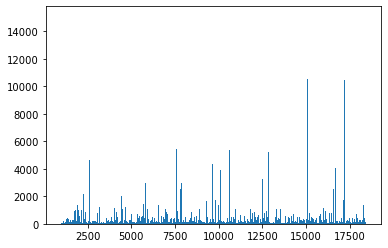

In [17]:
plt.hist(train_transaction['card1'],bins=1000)

<BarContainer object of 1 artists>

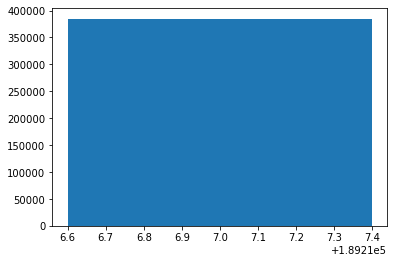

In [32]:
plt.bar(train_transaction['card4'].value_counts().index,train_transaction['card4'].value_counts()[0])

In [35]:
train_transaction['card4'].value_counts().index

Index(['visa', 'mastercard', 'american express', 'discover'], dtype='object')

# ____________________________#

In [167]:
## 까먹고 변수 변환을 안했넹 ㅎㅎ;;

from sklearn.ensemble import IsolationForest

clf=IsolationForest()
clf.fit(train_transaction.drop(train_transaction[['isFraud']],axis=1))
predict=clf.predict(train_transaction.drop(train_transaction[['isFraud']],axis=1))

train_y['predict']=predict

ValueError: could not convert string to float: 'W'